In [1]:
import os, sys
%pylab inline

Populating the interactive namespace from numpy and matplotlib


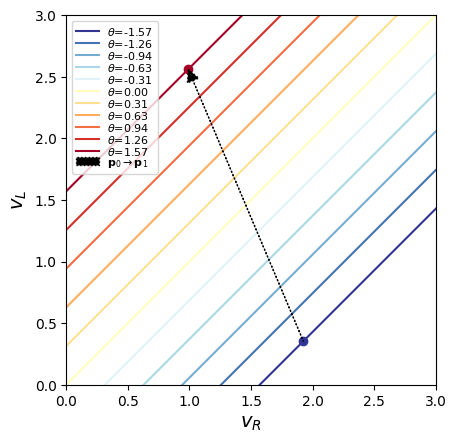

In [74]:
def plot_sols(L0=0.5, L1=1.4):
    th_min, th_max = -pi/2, pi/2
    # th = v_L - v_R
    th_vals = linspace(th_min, th_max, 11)
    p0 = np.array([pi/2, 0]) + L0*np.array([1,1])/sqrt(2)
    p1 = np.array([0, pi/2]) + L1*np.array([1,1])/sqrt(2)

    col_fun = lambda th: cm.RdYlBu_r((th-th_min)/(th_max-th_min))
    v_R = linspace(0, 3*pi, 10)
    for th in th_vals:
        v_L = v_R + th
        plot(v_R, v_L, color=col_fun(th), label=f'$\\theta$={th:.2f}')
    plot(*p0, 'o', color=col_fun(th_min))
    plot(*p1, 'o', color=col_fun(th_max))
    # Plot an arrow from p0 to p1 whose arrowhead is at p1
    arrow(p0[0], p0[1], p1[0]-p0[0], p1[1]-p0[1], head_width=0.1, head_length=0.1, fc='k', ec='k', length_includes_head=True, zorder=10, linestyle=":", label="$\\mathbf{p}_0 \\to \\mathbf{p}_1$")
    axis('square')
    xlim(0, 3)
    ylim(0, 3)
    xlabel('$v_R$', fontsize=14)
    ylabel('$v_L$', fontsize=14)
    legend(labelspacing=0, fontsize=8)
    return p0, p1

def plot_eigs(p_cent, e1, e2):
  arrow(p_cent[0], p_cent[1], e1[0], e1[1], head_width=0.1, head_length=0.1, fc='red', ec='red', length_includes_head=True, zorder=10, linestyle=":", label="$\\mathbf{q}_0$")
  arrow(p_cent[0], p_cent[1], e2[0], e2[1], head_width=0.1, head_length=0.1, fc='green', ec='green', length_includes_head=True, zorder=10, linestyle=":", label="$\\mathbf{q}_1$")
  legend(labelspacing=0, fontsize=8)

p0, p1 = plot_sols()

In [3]:
from scipy.integrate import odeint

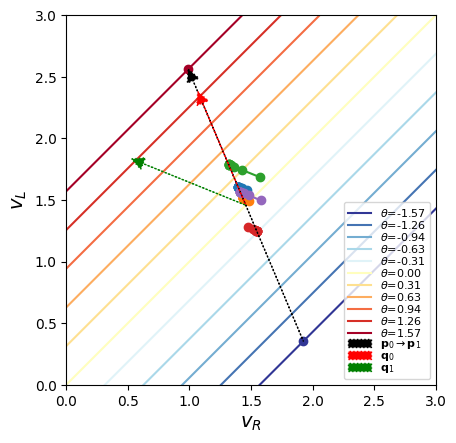

In [75]:
# We want to build a linear system that is a line attractor along p0-p1.
# du/dt = -u + Tv + h
# v = Gu + v_p
# dv/dt = Gdu/dt = -Gu + GTv + Gh = -Gu -v_p + GTv + Gh + v_p = -v + GTv + (Gh + v_p) = -v + Wv + f
# Let P have the eigenvectors of W
# W P = P D
# Then dv/dt = - v + P D P^{-1} v + f
# d(P^{-1} v)/dt = - P^{-1} v + D P^{-1} v + P^{-1} f
# Let y = P^{-1} v
# dy/dt = - y + D y + P^{-1} f
# Then y_i(t) = y_i(0) e^-(1-d_i)t + (P^{-1} f)_i (1 - e^-(1-d_i)t)/(1-d_i)
# If we make d_1 = 1, then the first component of y is a perfect integrator.
# We can make the other eigenvalues < 1 so that the other components decay to 0.
# We then have a line attractor along the first eigenvector of W.
#random.seed(1)
p0, p1 = plot_sols()
p_cent = (p0 + p1)/2
e1 = (p1 - p0)/norm(p1 - p0)
# Make e2 a random rotation of e1
rot = rand()*pi-pi/2
rot = pi/4
R = array([[cos(rot), -sin(rot)], [sin(rot), cos(rot)]])
e2 = R @ e1

plot_eigs(p_cent, e1, e2)

D = [1, 0.2]
P = np.column_stack((e1, e2))
iP= inv(P)
W = P @ np.diag(D) @ iP
p_cent_ = iP @ p_cent
f2_ = p_cent_[1] * (1 - D[1])
f_ = np.array([0, f2_])
f = P @ f_
# Simulate dv/dt = -v + Wv + f
T = 10
dvdt = lambda v, t: -v + W @ v + f
for i in range(5):
    v_init = p_cent + 0.5*(rand(2)-0.5)
    v_sol = odeint(dvdt, v_init, linspace(0, T, 10))
    plot(v_sol[:,0], v_sol[:,1], 'o-')

# Initialization

Let's try initializing so that we're on the $
theta = 0$ line. This just means setting our coordinate along the attractor dimension to whatever of $\mathbf p_0$, then moving it half-way along towards $\mathbf p_1$. That is $$\tilde v_{01} = \tilde p_{01} + {1\over 2} \|\mathbf p_1 - \mathbf p_0\|.$$ We can set the other coordinate arbitrarily.

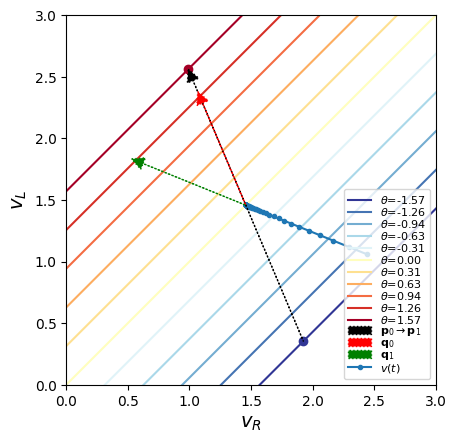

In [79]:
p0, p1 = plot_sols()

plot_eigs(p_cent, e1, e2)

p0_ = iP @ p0

v_init_1 = p0_[0] + 0.5 * norm(p1 - p0)
v_init_2 = p0_[1] + randn() * 1

v_init_ = np.array([v_init_1, v_init_2])
v_init = P @ v_init_

v_sol = odeint(dvdt, v_init, linspace(0, T, 50))
plot(v_sol[:,0], v_sol[:,1], 'o-', markersize=3, label="$v(t)$")
legend(labelspacing=0,fontsize=8)